In [6]:
import Pkg
import JSON
using StochasticDiffEq, Plots, DiffEqDevTools, DiffEqProblemLibrary
using DiffEqProblemLibrary.SDEProblemLibrary: importsdeproblems; importsdeproblems()
import DiffEqProblemLibrary.SDEProblemLibrary: prob_sde_additivesystem,
            prob_sde_additive, prob_sde_2Dlinear, prob_sde_linear, prob_sde_wave
gr()
const N = 1000

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling DiffEqDevTools [f3b72e0c-5b89-59e1-b016-84e28bfd966d]
└ @ Base loading.jl:1278
┌ Info: Precompiling DiffEqProblemLibrary [a077e3f3-b75c-5d7f-a0c6-6bc4c8ec64a9]
└ @ Base loading.jl:1278
┌ Info: Precompiling Catalyst [479239e8-5488-4da2-87a7-35f2df7eef83]
└ @ Base loading.jl:1278


1000

In [37]:
reltols = 1.0 ./ 10.0 .^ (1:5)
abstols = reltols#[0.0 for i in eachindex(reltols)]



setups = [Dict(:alg=>SRIW1())
          Dict(:alg=>SRIW2())
          Dict(:alg=>EM(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1))
          Dict(:alg=>RKMil(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false)
          Dict(:alg=>SRIW1(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false)
          Dict(:alg=>SRA1(),:dts=>1.0./5.0.^((1:length(reltols)) .+ 1),:adaptive=>false)
          Dict(:alg=>SRA1())
          Dict(:alg=>SRA2())
          Dict(:alg=>SRA3())
          Dict(:alg=>SOSRA())
          Dict(:alg=>SOSRI())
          Dict(:alg=>SOSRA2())
          Dict(:alg=>SOSRI2())
          ]
names = ["SRIW1","SRIW2","EM","RKMil","SRIW1 Fixed","SRA1 Fixed","SRA1", "SRA2", "SRA3", "SOSRA", "SOSRI", "SOSRA2", "SOSRI2"]


13-element Array{String,1}:
 "SRIW1"
 "SRIW2"
 "EM"
 "RKMil"
 "SRIW1 Fixed"
 "SRA1 Fixed"
 "SRA1"
 "SRA2"
 "SRA3"
 "SOSRA"
 "SOSRI"
 "SOSRA2"
 "SOSRI2"

┌ Info: Error calculation: 1/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 2/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 3/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 4/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 5/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 6/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 7/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 8/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculatio

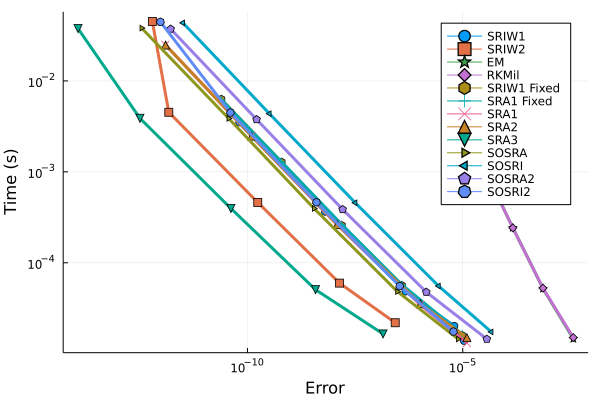

In [38]:
prob = prob_sde_additive
prob = remake(prob,tspan=(0.0,1.0))

wp = WorkPrecisionSet(prob,abstols,reltols,setups;numruns=N,names=names,maxiters=1e7,error_estimate=:l2)
plot(wp)

In [39]:
d = []
for i in 1:size(wp)
    t = []
    push!(d, Dict([("name", wp[i].name), ("times", wp[i].times), ("errors", wp[i].errors)]))
end

open("../models/additive_noise_problem_julia.json", "w+") do io
    write(io, JSON.json(d))
end

3162

┌ Info: Error calculation: 1/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 2/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 3/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 4/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 5/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 6/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 7/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 8/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculatio

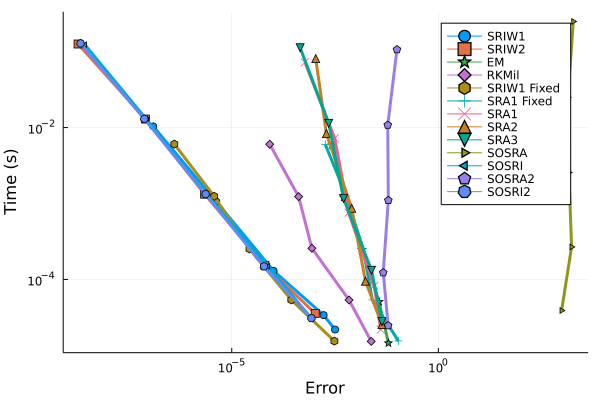

In [40]:
prob = prob_sde_linear
prob = remake(prob,tspan=(0.0,1.0))

wp = WorkPrecisionSet(prob,abstols,reltols,setups;numruns=N,names=names,maxiters=1e7,error_estimate=:l2)
plot(wp)

In [41]:
d = []
for i in 1:size(wp)
    t = []
    push!(d, Dict([("name", wp[i].name), ("times", wp[i].times), ("errors", wp[i].errors)]))
end

open("../models/diagonal_noise_problem_julia.json", "w+") do io
    write(io, JSON.json(d))
end

3065

┌ Info: Error calculation: 1/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 2/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 3/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 4/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 5/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 6/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 7/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculation: 8/20
└ @ DiffEqDevTools /home/tobias/.julia/packages/DiffEqDevTools/gQCoc/src/benchmark.jl:322
┌ Info: Error calculatio

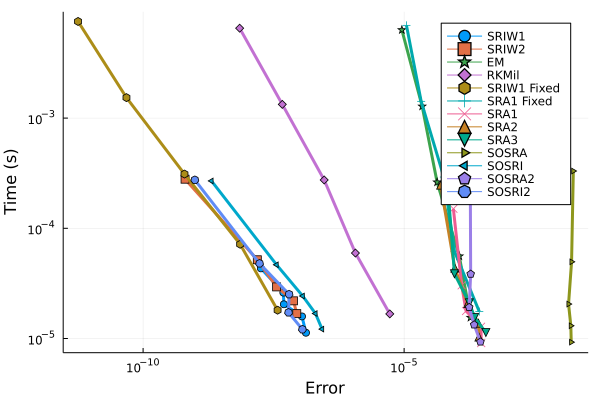

In [42]:
prob = prob_sde_wave
prob = remake(prob,tspan=(0.0,1.0))

wp = WorkPrecisionSet(prob,abstols,reltols,setups;numruns=N,names=names,maxiters=1e7,error_estimate=:l2)
plot(wp)

In [43]:
d = []
for i in 1:size(wp)
    t = []
    push!(d, Dict([("name", wp[i].name), ("times", wp[i].times), ("errors", wp[i].errors)]))
end

open("../models/scalar_wave_problem_julia.json", "w+") do io
    write(io, JSON.json(d))
end

3097